In [1]:
import requests
adres = "Hoogstraat 146, 9160 Lokeren"
response = requests.get(f"https://loc.geopunt.be/v4/location?q={adres}").json()
response

{'LocationResult': [{'Municipality': 'Lokeren',
   'Zipcode': '9160',
   'Thoroughfarename': 'Hoogstraat',
   'Housenumber': '146',
   'ID': 1126242,
   'FormattedAddress': 'Hoogstraat 146, 9160 Lokeren',
   'Location': {'Lat_WGS84': 51.10529617014935,
    'Lon_WGS84': 3.961153456170891,
    'X_Lambert72': 121452.31,
    'Y_Lambert72': 199545.21},
   'LocationType': 'crab_huisnummer_manueleAanduidingVanIngangVanGebouw',
   'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.10529617014935,
     'Lon_WGS84': 3.961153456170891,
     'X_Lambert72': 121452.31,
     'Y_Lambert72': 199545.21},
    'UpperRight': {'Lat_WGS84': 51.10529617014935,
     'Lon_WGS84': 3.961153456170891,
     'X_Lambert72': 121452.31,
     'Y_Lambert72': 199545.21}}}]}

In [4]:
import requests
import earthpy.plot as ep
import json
streetname = input('Give me the streetname?')
housenumber = input('Give me the housenumber?')
zipcode = input('Give me the zipcode?')
adres_api = {"straatnaam":{streetname}, "huisnummer":{housenumber}, "postcode":{zipcode}}
api_url = "https://api.basisregisters.vlaanderen.be/v1/adresmatch"
response1 = requests.get(url = api_url, params = adres_api).json()
response1

{'adresMatches': [{'identificator': {'id': 'https://data.vlaanderen.be/id/adres/1302241',
    'naamruimte': 'https://data.vlaanderen.be/id/adres',
    'objectId': '1302241',
    'versieId': '2016-02-01T10:24:37+01:00'},
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/1302241',
   'gemeente': {'objectId': '46014',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/gemeenten/46014',
    'gemeentenaam': {'geografischeNaam': {'spelling': 'Lokeren',
      'taal': 'nl'}}},
   'postinfo': {'objectId': '9160',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/postinfo/9160'},
   'straatnaam': {'objectId': '77064',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/straatnamen/77064',
    'straatnaam': {'geografischeNaam': {'spelling': 'Hoogstraat',
      'taal': 'nl'}}},
   'huisnummer': '146',
   'volledigAdres': {'geografischeNaam': {'spelling': 'Hoogstraat 146, 9160 Lokeren',
     'taal': 'nl'}},
   'adresPositie': {'point': {'coordinates': [12145

In [5]:
import requests
import earthpy.plot as ep
import json

response2 = requests.get(response1['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()


response2

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouweenheid/7570694',
  'naamruimte': 'https://data.vlaanderen.be/id/gebouweenheid',
  'objectId': '7570694',
  'versieId': '2017-03-09T17:15:54+01:00'},
 'geometriePunt': {'point': {'coordinates': [121455.47, 199539.62],
   'type': 'Point'}},
 'positieGeometrieMethode': 'afgeleidVanObject',
 'gebouweenheidStatus': 'gerealiseerd',
 'functie': 'gemeenschappelijkDeel',
 'gebouw': {'objectId': '7569832',
  'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouwen/7569832'},
 'adressen': [{'objectId': '1302241',
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/1302241'},
  {'objectId': '431272',
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/431272'}]}

In [6]:
response3 = requests.get(response2['gebouw']['detail']).json()
response3

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouw/7569832',
  'naamruimte': 'https://data.vlaanderen.be/id/gebouw',
  'objectId': '7569832',
  'versieId': '2017-03-09T17:15:54+01:00'},
 'geometriePolygoon': {'polygon': {'coordinates': [[[121465.63794352859,
      199545.93402853236],
     [121465.37227953225, 199545.9234685339],
     [121459.25586352497, 199545.67969253287],
     [121459.23755952716, 199546.13934053108],
     [121453.00024752319, 199545.89204453304],
     [121452.9961515218, 199545.9920125343],
     [121451.19967152178, 199545.91854053363],
     [121451.20376752317, 199545.8185725324],
     [121444.96619951725, 199545.56090853363],
     [121445.48895151913, 199532.90887652338],
     [121458.08927152306, 199533.4747645259],
     [121466.20171952993, 199534.0245245248],
     [121466.00920753181, 199538.2773245275],
     [121466.10911153257, 199538.28103652596],
     [121466.04319152981, 199540.06343653053],
     [121465.94322352856, 199540.05972452834],
    

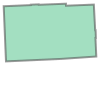

In [7]:
import requests
import earthpy.plot as ep
import json
from shapely.geometry.polygon import Polygon

#response4 = requests.get("https://api.basisregisters.vlaanderen.be/v1/gebouwen/7569832").json()
polygon_house = Polygon(response3["geometriePolygoon"]["polygon"]["coordinates"][0])
type(polygon_house)
float_house = (response3["geometriePolygoon"]["polygon"]["coordinates"][0])
polygon_house

In [15]:
dsm14 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k14.tif"
dtm14 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k14.tif"
dsm22 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k22.tif"
dtm22 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k22.tif"
dsm15 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k15.tif"
dtm15 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k15.tif"
dsm23 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k23.tif"
dtm23 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k23.tif"
dsm30 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k30.tif"
dtm30 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k30.tif"


In [22]:
from pathlib import Path
sorted(Path('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/').glob('*.tif'))


[PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k14.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k15.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k22.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k23.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDSMRAS1m_k30.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k14.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k15.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k22.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k23.tif'),
 PosixPath('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/DHMVIIDTMRAS1m_k30.tif')]

In [24]:
import rasterio
import requests
import json
from shapely.geometry.polygon import Polygon

src = rasterio.open(dsm14)
src.bounds

response4 = requests.get("https://api.basisregisters.vlaanderen.be/v1/gebouwen/7569832").json()
polygon_house = Polygon(response4["geometriePolygoon"]["polygon"]["coordinates"][0])
float_house = (response4["geometriePolygoon"]["polygon"]["coordinates"][0])

for x, y in float_house:
    if src.bounds[0] < x < src.bounds[2] and src.bounds[1] < y < src.bounds[3]:
        print("inside")
    else:
        print("outside")


TypeError: invalid path or file: <generator object Path.glob at 0x7fd389bf2660>

In [40]:
import os

with os.scandir('/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k/GeoTIFFall/') as entries:
    for entry in entries:
        src = rasterio.open(entry)
        src.boundsprint(entry.name)

TypeError: invalid path or file: <DirEntry 'DHMVIIDTMRAS1m_k30.tif'>

In [10]:
import rioxarray
import fiona
import rasterio
import rasterio.mask
from PIL import Image


with rasterio.open(dsm14) as src:
    out_image, out_transform = rasterio.mask.mask(src, [polygon_house], crop=True)
    clipdsm = out_image[0]
    
with rasterio.open(dtm14) as src:
    out_image, out_transform = rasterio.mask.mask(src, [polygon_house], crop=True)
    clipdtm = out_image[0]

clipchm = clipdsm - clipdtm


In [11]:
import plotly.graph_objects as go
from PIL import Image
import imageio
import pandas as pd
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Surface(z=clipchm)])

fig.update_layout(title='CHM', autosize=True)

fig.show()
